In [ ]:
!wget https://www.dropbox.com/sh/tdb2xjmotjk6uow/AAAzxn9iv4Cc2MvRrFrujhxha?dl=0

--2021-08-23 12:48:19--  https://www.dropbox.com/sh/tdb2xjmotjk6uow/AAAzxn9iv4Cc2MvRrFrujhxha?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/tdb2xjmotjk6uow/AAAzxn9iv4Cc2MvRrFrujhxha [following]
--2021-08-23 12:48:20--  https://www.dropbox.com/sh/raw/tdb2xjmotjk6uow/AAAzxn9iv4Cc2MvRrFrujhxha
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc421f22f22f8ed829d13c9d0f0.dl.dropboxusercontent.com/zip_download_get/A4LWMTJPcfmpWuxyPvZ2WnI96891Bu56YqVn2UvxnEcOD9ykhSFz4mcVbYSN5WXRpRhVJsVe6T9QnZ-BRg4QcFFt-T5CEcY3g2RIuqjQ_ub6HA# [following]
--2021-08-23 12:48:20--  https://ucc421f22f22f8ed829d13c9d0f0.dl.dropboxusercontent.com/zip_download_get/A4LWMTJPcfmpWuxyPvZ2WnI96891Bu56YqVn2UvxnEcOD9ykhSFz4mcVbYSN5WXRpRhVJsVe6T9Qn

In [ ]:
!unzip AAAzxn9iv4Cc2MvRrFrujhxha?dl=0

Archive:  AAAzxn9iv4Cc2MvRrFrujhxha?dl=0
mapname:  conversion of  failed
   creating: genres/
   creating: genres/pop/
   creating: genres/rock/
   creating: genres/jazz/
   creating: genres/metal/
   creating: genres/blues/
 extracting: genres/ro.mf            
 extracting: genres/hi.mf            
 extracting: genres/cl.mf            
 extracting: genres/re.mf            
 extracting: genres/bl.mf            
 extracting: genres/po.mf            
 extracting: genres/ja.mf            
 extracting: genres/co.mf            
   creating: genres/disco/
 extracting: genres/di.mf            
 extracting: genres/me.mf            
   creating: genres/reggae/
   creating: genres/hiphop/
 extracting: mfcc_data.json          
   creating: genres/country/
 extracting: genres/input.mf         
   creating: genres/classical/
 extracting: genres/pop/pop.00034.wav  
 extracting: genres/pop/pop.00098.wav  
 extracting: genres/pop/pop.00041.wav  
 extracting: genres/pop/pop.00006.wav  
 extracting: gen

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [ ]:
DATA_PATH = '/content/mfcc_data.json'

In [ ]:
def load_data(data_path):
  """Load Training dataset from the JSON file.
  
  :param data_path (str): Path to JSON file containing data
  :return X (ndarray): Inputs
  :return y (ndarray): Targets
  """
  with open(data_path,"r") as fp:
    data = json.load(fp)
  X = np.array(data["mfcc"])
  y = np.array(data["labels"])
  return X, y

## Create train, validation, and test sets

In [ ]:
def prepare_datasets(test_size, validation_size):
  #load data
  X,y = load_data(DATA_PATH)

  # create train/test split
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)

  # create train/validation split
  X_train, X_validation, y_train, y_validation = train_test_split(X_train,y_train,test_size=validation_size)

  # # For a CNN tensorflow expects a 3D array for each sample, because we have the third dimension which is the channel
  # # 3D array -> change dimension (130,13) to -> (130,13,1)
  # X_train = X_train[..., np.newaxis] # Xtrain will be a 4D array -> (num_samples,130,13,1)
  # X_validation = X_validation[..., np.newaxis]
  # X_test = X_test[...,np.newaxis]

  return (X_train, X_validation, X_test, y_train, y_validation,y_test)

In [ ]:
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25,0.2)

In [ ]:
def build_model(input_shape):
  """Generates RNN-LSTM model

  :param input_shape (tuple): Shape of input set
  :return  model: RNN-LSTM model
  """
  # create model
  model = keras.Sequential()

  # 2 LSTM layers
  model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
  model.add(keras.layers.LSTM(64))

  # Dense layers
  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(keras.layers.Dropout(0.3))

  # Output layer that uses softmax activation
  model.add(keras.layers.Dense(10,activation='softmax'))

  model.summary()
  return model


In [ ]:
# Since we know that unlike for CNN for RNNs tensorlfow expects 2 dimensioanal array only as input shape

input_shape = (X_train.shape[1],X_train.shape[2])  # 1st sdimension -> 130 (number of slice or n_steps) , 2nd dimension -> 13(actuall mfcc coefficients that we extracted) 
model = build_model(input_shape)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 130, 64)           19968     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________


### Compile Model

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 130, 64)           19968     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________


### Train Model

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

Epoch 1/30
188/188 [==============================] - 21s 68ms/step - loss: 2.2456 - accuracy: 0.1721 - val_loss: 2.1210 - val_accuracy: 0.3180
Epoch 2/30
188/188 [==============================] - 12s 63ms/step - loss: 2.0144 - accuracy: 0.3032 - val_loss: 1.8506 - val_accuracy: 0.3753
Epoch 3/30
188/188 [==============================] - 12s 63ms/step - loss: 1.8208 - accuracy: 0.3583 - val_loss: 1.6667 - val_accuracy: 0.4067
Epoch 4/30
188/188 [==============================] - 12s 63ms/step - loss: 1.6632 - accuracy: 0.4019 - val_loss: 1.5569 - val_accuracy: 0.4440
Epoch 5/30
188/188 [==============================] - 12s 64ms/step - loss: 1.5717 - accuracy: 0.4339 - val_loss: 1.4932 - val_accuracy: 0.4780
Epoch 6/30
188/188 [==============================] - 12s 64ms/step - loss: 1.4814 - accuracy: 0.4752 - val_loss: 1.4165 - val_accuracy: 0.5067
Epoch 7/30
188/188 [==============================] - 12s 63ms/step - loss: 1.4241 - accuracy: 0.4982 - val_loss: 1.3783 - val_accuracy:

### Plot accuracy/error for training and validation

In [ ]:
def plot_history(history):
  fig, axs = plt.subplots(2)

  # create accuracy subplot
  axs[0].plot(history.history['accuracy'],label="train accuracy")
  axs[0].plot(history.history['val_accuracy'], label="validation accuracy")
  axs[0].set_ylabel("Accuracy")
  axs[0].set_xlabel("Epoch")
  axs[0].legend(loc="lower right")
  axs[0].set_title("Accuracy Evaluation")

  # create errpr/loss subplot
  axs[1].plot(history.history['loss'],label="train error")
  axs[1].plot(history.history['val_loss'],label="validation error")
  axs[1].set_ylabel("Error")
  axs[1].set_xlabel("Epoch")
  axs[1].legend("upper right")
  axs[1].set_title("Error Evaluation")

  plt.show()



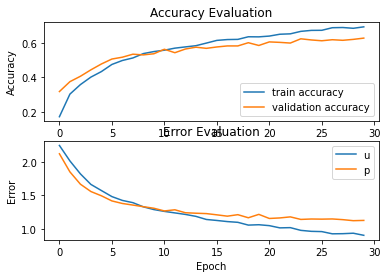

In [ ]:
plot_history(history)

## 